# PARTE 1 - DADOS DOS JOGOS

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import leaguegamefinder

# Função para extrair dados dos jogos de uma temporada específica
def extrair_jogos_nba(temporada_inicio):
    """
    Extrai os dados dos jogos da NBA para a temporada especificada.
    
    Args:
        temporada_inicio (int): Ano de início da temporada. Ex: 2023 para 2023-24.
        
    Returns:
        pandas.DataFrame: Dados dos jogos da temporada.
    """
    # Usando o LeagueGameFinder para buscar os jogos
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=f"{temporada_inicio}-{str(temporada_inicio + 1)[-2:]}")
    
    # Transformar os dados em um DataFrame
    games = gamefinder.get_data_frames()[0]
    return games

# Extração das temporadas 2023-24 e 2024-25
dados_2023_24 = extrair_jogos_nba(2023)
dados_2024_25 = extrair_jogos_nba(2024)

# Concatenar os dados das duas temporadas
dados_nba = pd.concat([dados_2023_24, dados_2024_25])

# Exibir informações gerais
print(f"Número de jogos coletados: {len(dados_nba)}")
print(dados_nba.head())

# Salvar os dados em um arquivo CSV
dados_nba.to_csv("nba_games_2023_2025.csv", index=False)
# print("Dados salvos em 'nba_games_2023_2025.csv'.")


Número de jogos coletados: 6853
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION         TEAM_NAME     GAME_ID  \
0     42023  1610612742               DAL  Dallas Mavericks  0042300405   
1     42023  1610612738               BOS    Boston Celtics  0042300405   
2     42023  1610612742               DAL  Dallas Mavericks  0042300404   
3     42023  1610612738               BOS    Boston Celtics  0042300404   
4     42023  1610612742               DAL  Dallas Mavericks  0042300403   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2024-06-17    DAL @ BOS  L  240   88  ...   0.538     7    28   35   18   
1  2024-06-17  BOS vs. DAL  W  240  106  ...   0.850    15    36   51   25   
2  2024-06-14  DAL vs. BOS  W  240  122  ...   0.682    13    39   52   21   
3  2024-06-14    BOS @ DAL  L  239   84  ...   0.923     4    27   31   18   
4  2024-06-12  DAL vs. BOS  L  240   99  ...   0.875     7    36   43   15   

   STL  BLK  TOV  PF  PLUS_MINUS  
0    4    4  

In [48]:
dados_nba.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [49]:
variables_dict = {
    "SEASON_ID": "Identificador da temporada (ex.: '22023' para a temporada 2023-2024).",
    "TEAM_ID": "Identificador único do time.",
    "TEAM_ABBREVIATION": "Abreviação do nome do time (ex.: 'CHA' para Charlotte Hornets).",
    "TEAM_NAME": "Nome completo do time (ex.: 'Charlotte Hornets').",
    "GAME_ID": "Identificador único da partida.",
    "GAME_DATE": "Data em que o jogo foi realizado (formato YYYY-MM-DD).",
    "MATCHUP": "Confronto da partida, incluindo local (ex.: 'CHA vs BOS' ou 'CHA @ BOS').",
    "WL": "Resultado do jogo para o time (W = Vitória, L = Derrota).",
    "MIN": "Minutos totais jogados pelo jogador na partida.",
    "PTS": "Pontos marcados pelo jogador na partida.",
    "FGM": "Field Goals Made - Arremessos de quadra convertidos.",
    "FGA": "Field Goals Attempted - Arremessos de quadra tentados.",
    "FG_PCT": "Field Goal Percentage - Porcentagem de acertos nos arremessos de quadra.",
    "FG3M": "3-Point Field Goals Made - Cestas de 3 pontos convertidas.",
    "FG3A": "3-Point Field Goals Attempted - Cestas de 3 pontos tentadas.",
    "FG3_PCT": "3-Point Field Goal Percentage - Porcentagem de acertos nos arremessos de 3 pontos.",
    "FTM": "Free Throws Made - Lances livres convertidos.",
    "FTA": "Free Throws Attempted - Lances livres tentados.",
    "FT_PCT": "Free Throw Percentage - Porcentagem de acertos nos lances livres.",
    "OREB": "Offensive Rebounds - Rebotes ofensivos capturados.",
    "DREB": "Defensive Rebounds - Rebotes defensivos capturados.",
    "REB": "Rebounds - Total de rebotes (ofensivos + defensivos).",
    "AST": "Assists - Total de assistências.",
    "STL": "Steals - Total de roubos de bola.",
    "BLK": "Blocks - Total de bloqueios (tocos).",
    "TOV": "Turnovers - Total de perdas de posse de bola.",
    "PF": "Personal Fouls - Faltas pessoais cometidas.",
    "PLUS_MINUS": "Plus/Minus - Diferença de pontos no placar enquanto o jogador estava em quadra."
}

In [50]:
# Função para extrair jogos de um time em uma temporada específica
def extrair_jogos_time(temporada_inicio, time):
    """
    Extrai os dados dos jogos de um time específico em uma temporada.
    
    Args:
        temporada_inicio (int): Ano de início da temporada. Ex: 2023 para 2023-24.
        time (str): Nome completo do time. Ex: "Charlotte Hornets".
        
    Returns:
        pandas.DataFrame: Dados dos jogos do time na temporada.
    """
    # Usando o LeagueGameFinder para buscar jogos da temporada
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=f"{temporada_inicio}-{str(temporada_inicio + 1)[-2:]}")
    
    # Transformar os dados em um DataFrame
    games = gamefinder.get_data_frames()[0]
    
    # Filtrar jogos do time (casa ou visitante)
    jogos_time = games[
        (games['TEAM_NAME'] == time)
    ]
    return jogos_time

# Nome do time
team_name = "Charlotte Hornets"

# Extração para as temporadas 2023-24 e 2024-25
jogos_2023_24 = extrair_jogos_time(2023, team_name)
jogos_2024_25 = extrair_jogos_time(2024, team_name)

# Concatenar os dados das duas temporadas
jogos_hornets = pd.concat([jogos_2023_24, jogos_2024_25])

# Exibir informações gerais
print(f"Número de jogos coletados para {team_name}: {len(jogos_hornets)}")
print(jogos_hornets.head())

# Salvar os dados em um arquivo CSV
# jogos_hornets.to_csv(f"{team_name.replace(' ', '_').lower()}_games_2023_2025.csv", index=False)
# print(f"Dados salvos em '{team_name.replace(' ', '_').lower()}_games_2023_2025.csv'.")

Número de jogos coletados para Charlotte Hornets: 135
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
203     22023  1610612766               CHA  Charlotte Hornets  0022301187   
234     22023  1610612766               CHA  Charlotte Hornets  0022301173   
254     22023  1610612766               CHA  Charlotte Hornets  0022301159   
283     22023  1610612766               CHA  Charlotte Hornets  0022301144   
297     22023  1610612766               CHA  Charlotte Hornets  0022301135   

      GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
203  2024-04-14    CHA @ CLE  W  241  120  ...   0.818    10    37   47   36   
234  2024-04-12    CHA @ BOS  L  240   98  ...   0.864     4    29   33   20   
254  2024-04-10    CHA @ ATL  W  241  115  ...   0.955     5    28   33   25   
283  2024-04-09  CHA vs. DAL  L  240  104  ...   0.762     8    31   39   24   
297  2024-04-07  CHA vs. OKC  L  241  118  ...   0.786     7    29   36   29 

In [51]:
jogos_hornets

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
203,22023,1610612766,CHA,Charlotte Hornets,0022301187,2024-04-14,CHA @ CLE,W,241,120,...,0.818,10,37,47,36,10,9,9,11,10.0
234,22023,1610612766,CHA,Charlotte Hornets,0022301173,2024-04-12,CHA @ BOS,L,240,98,...,0.864,4,29,33,20,3,7,19,15,-33.0
254,22023,1610612766,CHA,Charlotte Hornets,0022301159,2024-04-10,CHA @ ATL,W,241,115,...,0.955,5,28,33,25,11,2,13,18,1.0
283,22023,1610612766,CHA,Charlotte Hornets,0022301144,2024-04-09,CHA vs. DAL,L,240,104,...,0.762,8,31,39,24,8,3,11,16,-26.0
297,22023,1610612766,CHA,Charlotte Hornets,0022301135,2024-04-07,CHA vs. OKC,L,241,118,...,0.786,7,29,36,29,12,9,18,14,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,12024,1610612766,CHA,Charlotte Hornets,0012400061,2024-10-17,CHA @ IND,L,266,116,...,0.652,11,41,52,28,11,8,32,30,-5.0
2369,12024,1610612766,CHA,Charlotte Hornets,0012400052,2024-10-15,CHA @ NYK,L,239,105,...,0.867,12,33,45,22,8,5,13,19,-6.0
2417,12024,1610612766,CHA,Charlotte Hornets,0012400027,2024-10-10,CHA @ MEM,W,238,119,...,0.818,13,35,48,22,9,6,21,21,25.0
2433,12024,1610612766,CHA,Charlotte Hornets,0012400015,2024-10-08,CHA vs. MIA,W,241,111,...,0.771,15,40,55,19,7,7,21,21,3.0


In [52]:
# 1. Verificar dados ausentes
print("Dados Ausentes:")
print(jogos_hornets.isnull().sum())  # Contagem de valores nulos
print("\n")

Dados Ausentes:
SEASON_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_NAME            0
GAME_ID              0
GAME_DATE            0
MATCHUP              0
WL                   0
MIN                  0
PTS                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PLUS_MINUS           0
dtype: int64




In [53]:
# 2. Verificar valores redundantes (duplicados)
print("Valores Duplicados:")
print(jogos_hornets.duplicated().sum())  # Contagem de linhas duplicadas
print("\n")

Valores Duplicados:
0




In [54]:
# 3. Verificar inconsistências (valores fora do padrão esperado)
print("Resumo Estatístico:")
print(jogos_hornets.describe(include="all"))  # Resumo estatístico de variáveis numéricas e categóricas
print("\n")

Resumo Estatístico:
       SEASON_ID       TEAM_ID TEAM_ABBREVIATION          TEAM_NAME  \
count        135  1.350000e+02               135                135   
unique         4           NaN                 1                  1   
top        22023           NaN               CHA  Charlotte Hornets   
freq          82           NaN               135                135   
mean         NaN  1.610613e+09               NaN                NaN   
std          NaN  0.000000e+00               NaN                NaN   
min          NaN  1.610613e+09               NaN                NaN   
25%          NaN  1.610613e+09               NaN                NaN   
50%          NaN  1.610613e+09               NaN                NaN   
75%          NaN  1.610613e+09               NaN                NaN   
max          NaN  1.610613e+09               NaN                NaN   

           GAME_ID  ...         STL         BLK         TOV          PF  \
count          135  ...  135.000000  135.000000  135

In [55]:
# 4. Detectar valores enviesados (distribuições assimétricas)
numeric_columns = jogos_hornets.select_dtypes(include=[np.number]).columns
print("Skewness (Assimetria das Distribuições):")
print(jogos_hornets[numeric_columns].skew())  # Valores próximos de 0 indicam baixa assimetria
print("\n")

Skewness (Assimetria das Distribuições):
TEAM_ID       0.000000
MIN           4.287210
PTS          -0.134509
FGM          -0.066650
FGA           0.194713
FG_PCT        0.282863
FG3M          0.268049
FG3A          0.336385
FG3_PCT       0.070905
FTM           0.243013
FTA           0.273321
FT_PCT       -0.329109
OREB          0.672742
DREB          0.324763
REB           0.483411
AST           0.210141
STL           0.085137
BLK           0.292382
TOV           0.602425
PF            0.042152
PLUS_MINUS   -0.229664
dtype: float64




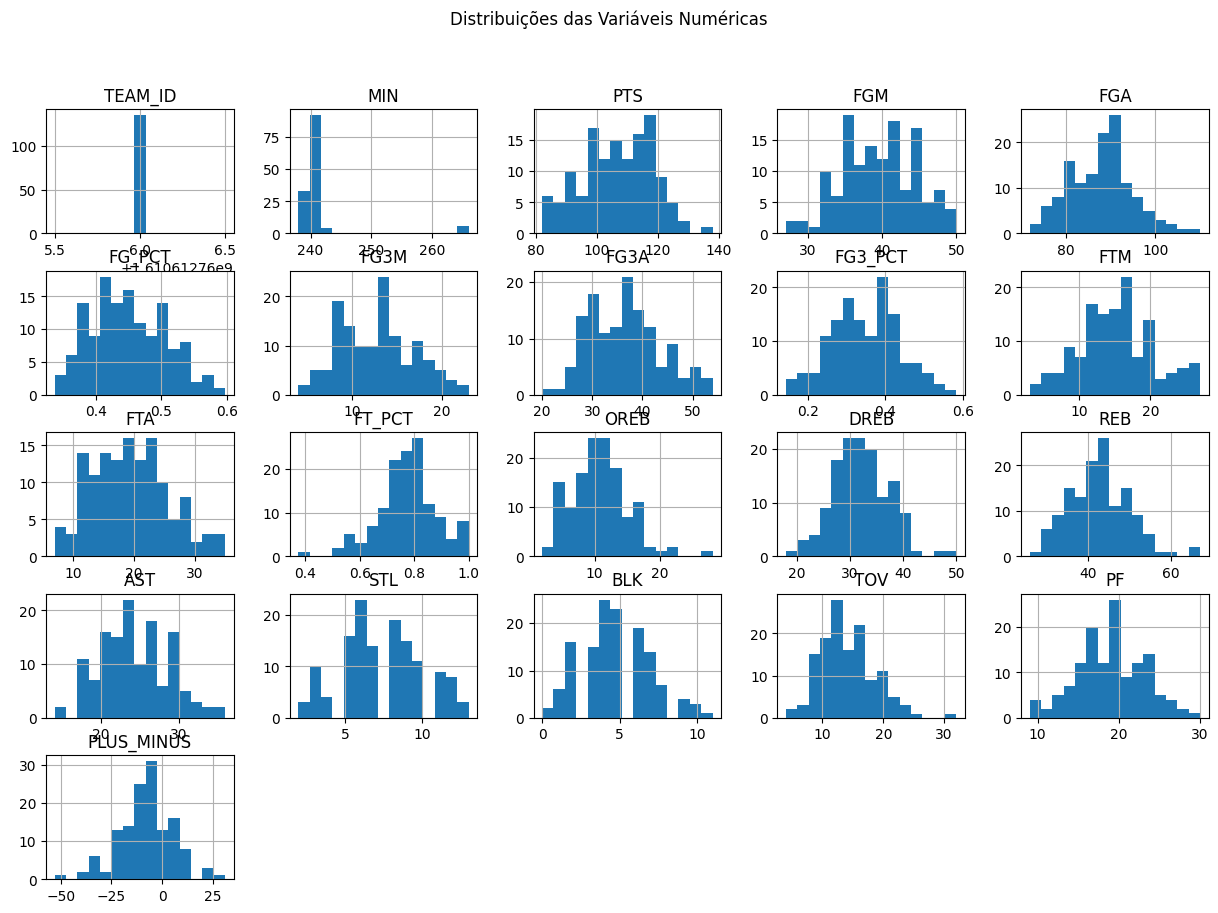

In [56]:
# Visualizar distribuições das variáveis numéricas
jogos_hornets[numeric_columns].hist(figsize=(15, 10), bins=15)
plt.suptitle("Distribuições das Variáveis Numéricas")
plt.show()

In [57]:
# 5. Detectar valores ruidosos e outliers
print("Outliers (utilizando o método IQR):")
for column in numeric_columns:
    Q1 = jogos_hornets[column].quantile(0.25)  # Primeiro quartil
    Q3 = jogos_hornets[column].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = jogos_hornets[(jogos_hornets[column] < lower_bound) | (jogos_hornets[column] > upper_bound)]
    if not outliers.empty:
        print(f"Coluna {column} tem {len(outliers)} outliers.")
print("\n")

Outliers (utilizando o método IQR):
Coluna MIN tem 8 outliers.
Coluna FGA tem 2 outliers.
Coluna FT_PCT tem 3 outliers.
Coluna OREB tem 3 outliers.
Coluna DREB tem 1 outliers.
Coluna REB tem 2 outliers.
Coluna BLK tem 1 outliers.
Coluna TOV tem 1 outliers.
Coluna PLUS_MINUS tem 5 outliers.




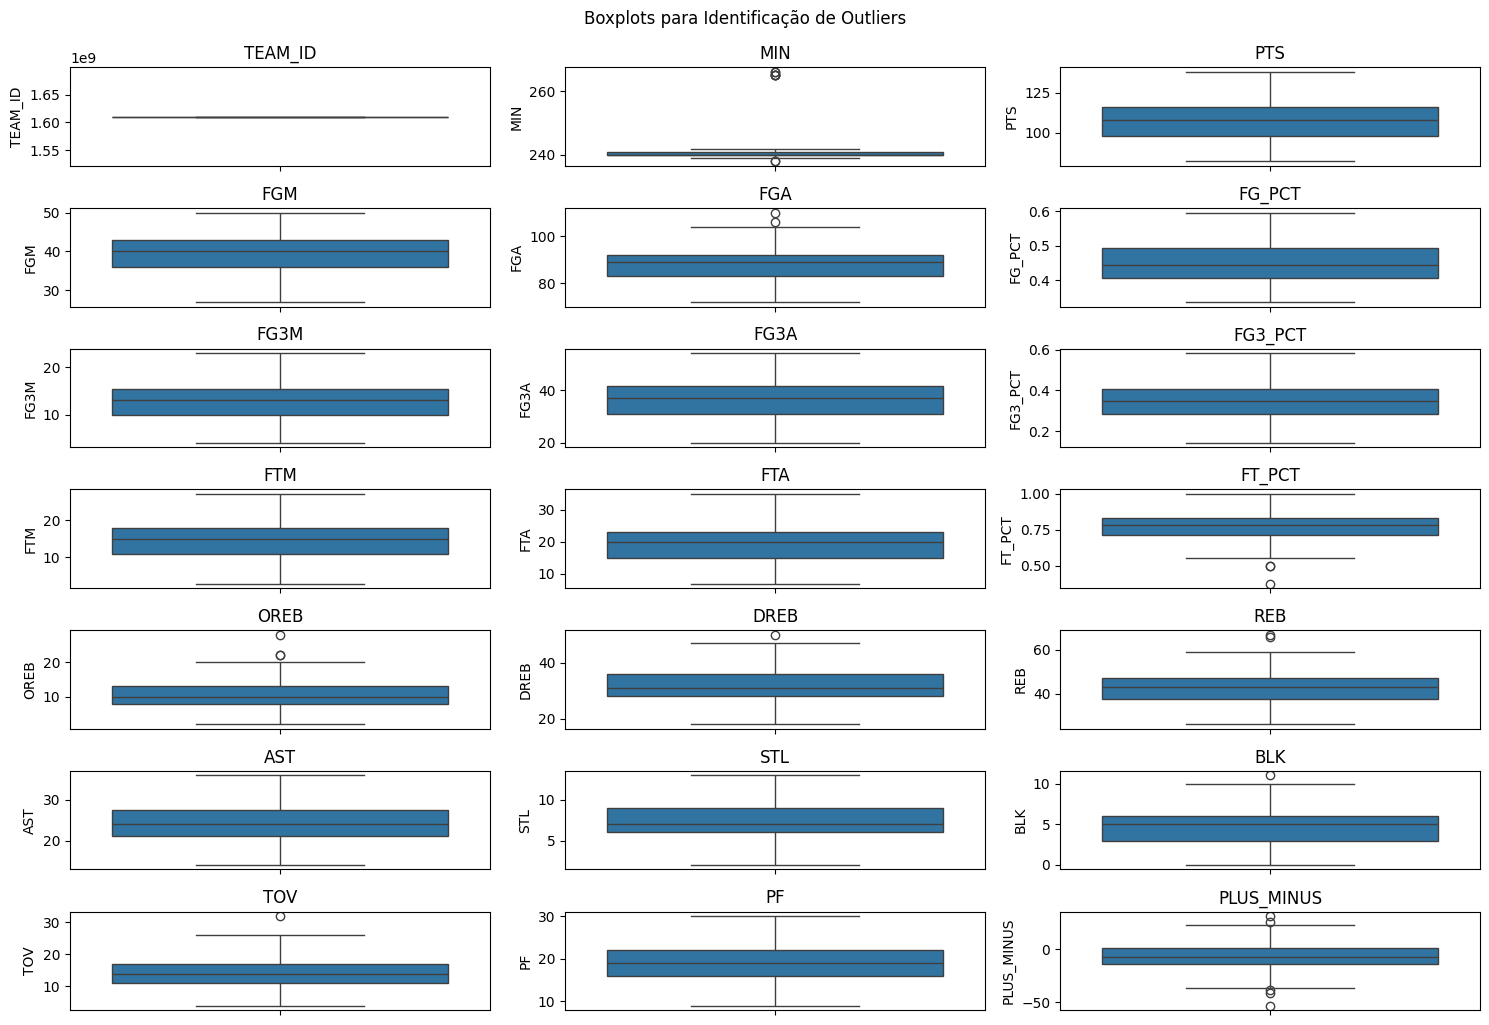

In [58]:
# Visualizar os outliers com boxplots
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the subplots
num_cols = 3  # Number of columns
num_rows = int(np.ceil(len(numeric_columns) / num_cols)) # Number of rows calculated dynamically

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjusted subplot layout
    sns.boxplot(data=jogos_hornets, y=column)
    plt.title(column)

plt.tight_layout()
plt.suptitle("Boxplots para Identificação de Outliers", y=1.02)
plt.show()

Justificativa: A Coluna como MIN (minutos jogados): Apresenta um valor que pode ser legítimo, pois um jogador pode ter tido tempos de jogo muito altos ou baixos.
FGA, FTA, REB, PLUS_MINUS, etc.: Estes valores extremos podem ocorrer naturalmente em desempenhos excepcionais, então o contexto dos jogos deve ser considerado.

In [59]:
# Imputação de Outliers (ajuste de valores extremos)
# Clamping (limitação): Ajusta os outliers para os limites do intervalo IQR.

# for column in ['MIN', 'FGA', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'BLK', 'TOV', 'PLUS_MINUS']:
#     Q1 = jogos_hornets[column].quantile(0.25)
#     Q3 = jogos_hornets[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     jogos_hornets[column] = np.where(jogos_hornets[column] < lower_bound, lower_bound, jogos_hornets[column])
#     jogos_hornets[column] = np.where(jogos_hornets[column] > upper_bound, upper_bound, jogos_hornets[column])


In [60]:
# 6. Resumo de possíveis problemas
print("Problemas Identificados:")
if jogos_hornets.isnull().values.any():
    print("- Existem dados ausentes.")
if jogos_hornets.duplicated().any():
    print("- Existem dados redundantes (duplicados).")
if not jogos_hornets[numeric_columns].skew().between(-0.5, 0.5).all():
    print("- Existem variáveis com distribuição enviesada.")
print("- Análise de outliers foi realizada (veja os gráficos de boxplot).")

Problemas Identificados:
- Existem variáveis com distribuição enviesada.
- Análise de outliers foi realizada (veja os gráficos de boxplot).


In [61]:
# 4. (Opcional) Salvar o dataset transformado
# jogos_hornets.to_csv("charlotte_hornets_games_transformed.csv", index=False)

In [62]:
# Transformações Logarítmicas
skewed_columns = ['FGA', 'FTA', 'REB']
for column in skewed_columns:
    jogos_hornets[column] = np.log1p(jogos_hornets[column])  # log(1 + valor)

In [63]:
# Normalização ou Padronização
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
jogos_hornets[numeric_columns] = scaler.fit_transform(jogos_hornets[numeric_columns])

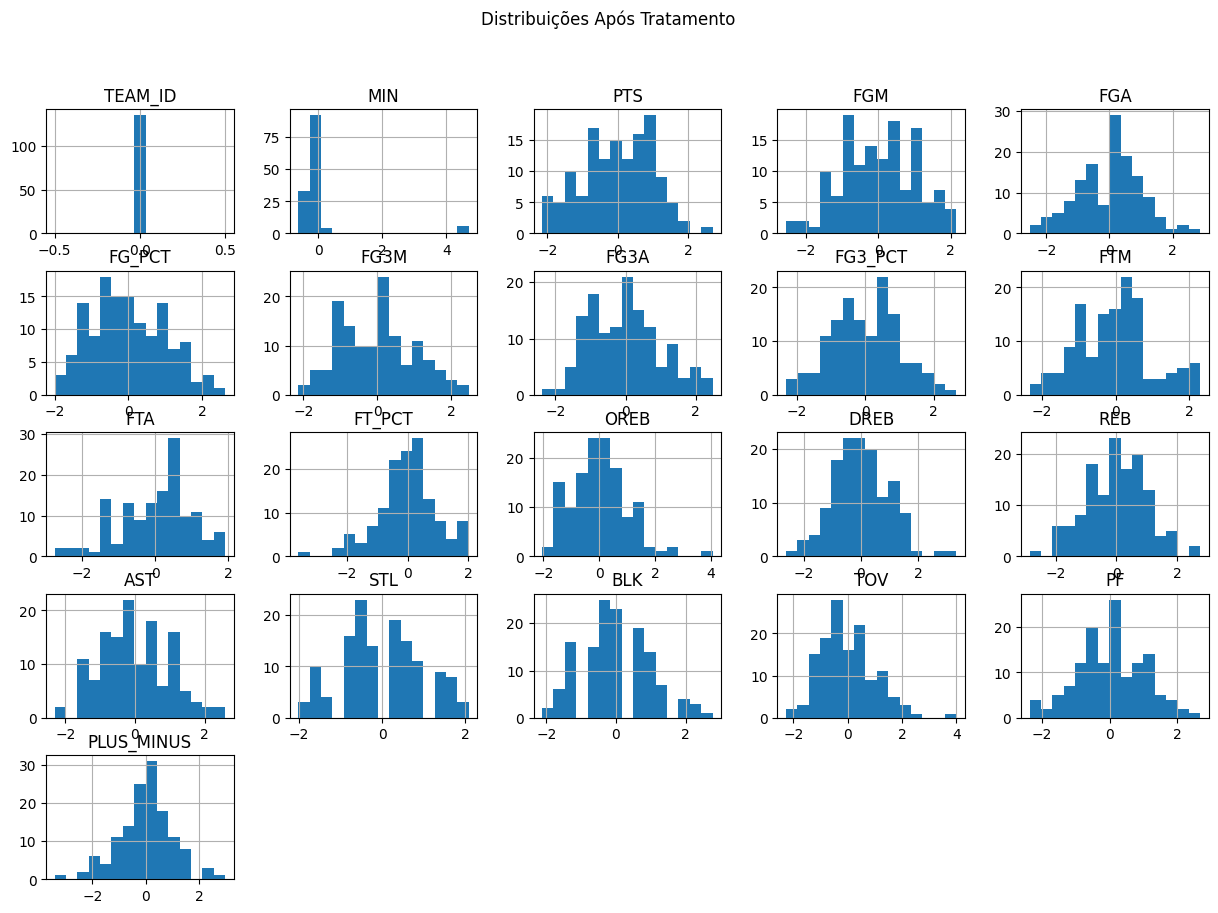

In [64]:
# Histogramas
jogos_hornets[numeric_columns].hist(figsize=(15, 10), bins=15)
plt.suptitle("Distribuições Após Tratamento")
plt.show()

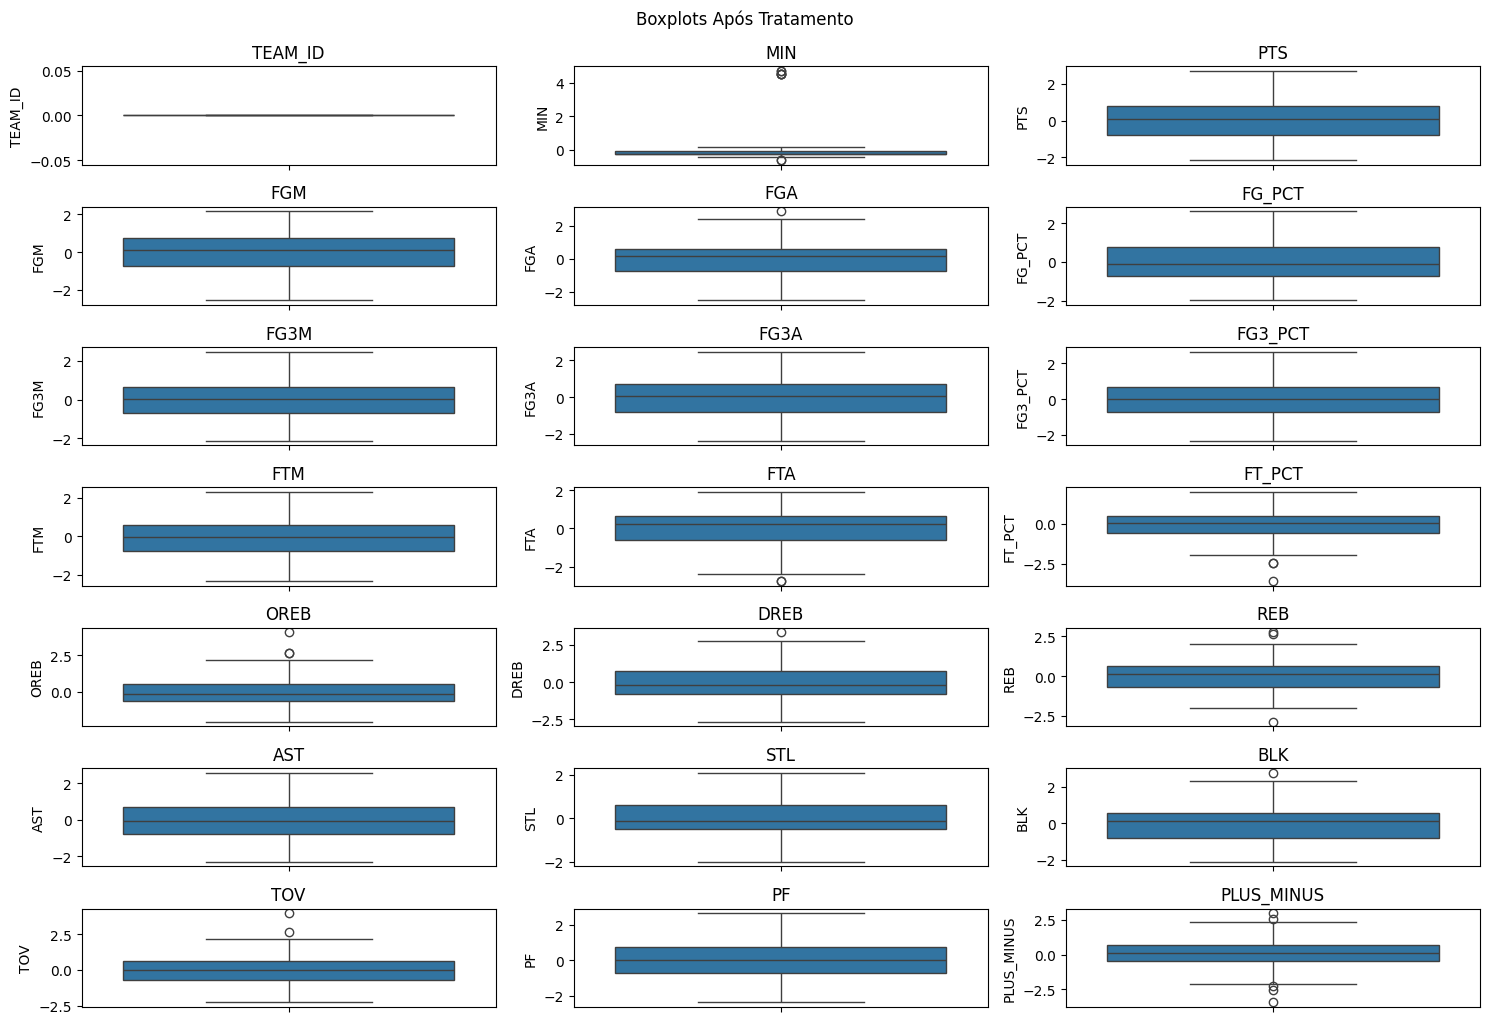

In [65]:
# Boxplots
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the subplots
num_cols = 3  # Number of columns
num_rows = int(np.ceil(len(numeric_columns) / num_cols)) # Number of rows calculated dynamically


for i, column in enumerate(numeric_columns):
    # Adjust the subplot layout to accommodate all numeric columns
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=jogos_hornets, y=column)
    plt.title(column)

plt.tight_layout()
plt.suptitle("Boxplots Após Tratamento", y=1.02)
plt.show()

In [66]:
jogos_hornets.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [67]:
# Excluir colunas que não são importantes para o modelo de previsão
columns_to_drop = [
    "SEASON_ID", "TEAM_ID", "TEAM_ABBREVIATION", "TEAM_NAME", "GAME_ID",
    "GAME_DATE", "MATCHUP", "WL", "MIN", "PLUS_MINUS"
]
jogos_hornets = jogos_hornets.drop(columns=columns_to_drop, errors="ignore")

In [68]:
# 1. Converter dados qualitativos para quantitativos
from sklearn.preprocessing import LabelEncoder, StandardScaler

qualitative_columns = jogos_hornets.select_dtypes(include=["object"]).columns  # Identificar colunas categóricas
label_encoders = {}
for column in qualitative_columns:
    le = LabelEncoder()
    jogos_hornets[column] = le.fit_transform(jogos_hornets[column])
    label_encoders[column] = le

In [69]:
# 3. Verificar a transformação
print("Dados transformados:")
print(jogos_hornets.head())

Dados transformados:
          PTS       FGM       FGA    FG_PCT      FG3M      FG3A   FG3_PCT  \
203  1.138428  1.339215  0.452873  0.985926  1.508415  0.480094  1.436669   
234 -0.765362 -1.533789 -1.839288 -0.505988  0.536405 -0.235278  0.915662   
254  0.705748  0.107928 -1.347055  1.003687  0.293403 -0.092203  0.462613   
283 -0.246147 -0.097287  0.169817 -0.204053 -0.678607 -0.664501 -0.398180   
297  0.965356  1.134001 -0.718709  1.643078  1.022410  0.480094  0.870357   

          FTM       FTA    FT_PCT      OREB      DREB       REB       AST  \
203 -1.173444 -1.497177  0.381202 -0.167002  0.916559  0.638227  2.584489   
234  0.749067  0.519955  0.794842 -1.576084 -0.580996 -1.464899 -0.971241   
254  1.133570  0.519955  1.613130 -1.341237 -0.768190 -1.464899  0.139925   
283  0.172314  0.382133 -0.122360 -0.636696 -0.206607 -0.473722 -0.082309   
297 -0.788942 -0.805325  0.093452 -0.871543 -0.580996 -0.949197  1.028857   

          STL       BLK       TOV        PF  
203  0.

In [70]:
# 4. (Opcional) Salvar o dataset transformado
# jogos_hornets.to_csv("charlotte_hornets_games_transformed_scaled.csv", index=False)

In [71]:
jogos_hornets.columns

Index(['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF'],
      dtype='object')

In [72]:
#RF1
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

# Definição das conferências
eastern_conference_teams = {
    "ATL", "BOS", "BKN", "CHA", "CHI", "CLE", "DET", "IND", "MIA", "MIL",
    "NYK", "ORL", "PHI", "TOR", "WAS"
}

western_conference_teams = {
    "DAL", "DEN", "GSW", "HOU", "LAC", "LAL", "MEM", "MIN", "NOP", "OKC",
    "PHX", "POR", "SAC", "SAS", "UTA"
}

# Função para listar todos os times agrupados por conferência
def get_teams_by_conference():
    nba_teams = teams.get_teams()
    
    # Criando listas para armazenar os times organizados por conferência
    eastern_conference = [
        {"ID": team["id"], "Nome": team["full_name"], "Sigla": team["abbreviation"], "Conferência": "Leste"}
        for team in nba_teams if team["abbreviation"] in eastern_conference_teams
    ]

    western_conference = [
        {"ID": team["id"], "Nome": team["full_name"], "Sigla": team["abbreviation"], "Conferência": "Oeste"}
        for team in nba_teams if team["abbreviation"] in western_conference_teams
    ]
    
    return eastern_conference, western_conference

In [73]:
# Função para buscar jogos por temporada
def get_games_by_season(season):
    try:
        gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
        games = gamefinder.get_data_frames()[0]
        return games
    except Exception as e:
        print(f"Erro ao buscar jogos da temporada {season}: {e}")
        return pd.DataFrame()  # Retorna um DataFrame vazio se houver erro

# Listar os times da NBA por conferência
eastern, western = get_teams_by_conference()

# 🔹 Exibir os times da Conferência Leste
print("\n **Times da Conferência Leste:**")
for team in sorted(eastern, key=lambda t: t["Nome"]):
    print(f"{team['Nome']} ({team['Sigla']}) - ID: {team['ID']}")

# 🔹 Exibir os times da Conferência Oeste
print("\n **Times da Conferência Oeste:**")
for team in sorted(western, key=lambda t: t["Nome"]):
    print(f"{team['Nome']} ({team['Sigla']}) - ID: {team['ID']}")

# 🔹 Buscar dados dos jogos das temporadas 2023-24 e 2024-25
games_2023_24 = get_games_by_season("2023-24")
games_2024_25 = get_games_by_season("2024-25")

# 🔹 Exibir os primeiros jogos disponíveis para cada temporada
# if not games_2023_24.empty:
#     print("\n **Jogos da temporada 2023-24:**")
#     print(games_2023_24.head())

# if not games_2024_25.empty:
#     print("\n **Jogos da temporada 2024-25:**")
#     print(games_2024_25.head())



 **Times da Conferência Leste:**
Atlanta Hawks (ATL) - ID: 1610612737
Boston Celtics (BOS) - ID: 1610612738
Brooklyn Nets (BKN) - ID: 1610612751
Charlotte Hornets (CHA) - ID: 1610612766
Chicago Bulls (CHI) - ID: 1610612741
Cleveland Cavaliers (CLE) - ID: 1610612739
Detroit Pistons (DET) - ID: 1610612765
Indiana Pacers (IND) - ID: 1610612754
Miami Heat (MIA) - ID: 1610612748
Milwaukee Bucks (MIL) - ID: 1610612749
New York Knicks (NYK) - ID: 1610612752
Orlando Magic (ORL) - ID: 1610612753
Philadelphia 76ers (PHI) - ID: 1610612755
Toronto Raptors (TOR) - ID: 1610612761
Washington Wizards (WAS) - ID: 1610612764

 **Times da Conferência Oeste:**
Dallas Mavericks (DAL) - ID: 1610612742
Denver Nuggets (DEN) - ID: 1610612743
Golden State Warriors (GSW) - ID: 1610612744
Houston Rockets (HOU) - ID: 1610612745
Los Angeles Clippers (LAC) - ID: 1610612746
Los Angeles Lakers (LAL) - ID: 1610612747
Memphis Grizzlies (MEM) - ID: 1610612763
Minnesota Timberwolves (MIN) - ID: 1610612750
New Orleans Pel

In [74]:
# RF2
from nba_api.stats.endpoints import leaguestandings
# Obter os dados de classificação
standings = leaguestandings.LeagueStandings()
standings_df = standings.get_data_frames()[0]

# Exibir as primeiras linhas e os nomes das colunas
print(standings_df.head())  # Mostra os primeiros registros
# print(standings_df.columns)  # Lista todas as colunas disponíveis

  LeagueID SeasonID      TeamID       TeamCity   TeamName Conference  \
0       00    22024  1610612739      Cleveland  Cavaliers       East   
1       00    22024  1610612760  Oklahoma City    Thunder       West   
2       00    22024  1610612738         Boston    Celtics       East   
3       00    22024  1610612745        Houston    Rockets       West   
4       00    22024  1610612752       New York     Knicks       East   

  ConferenceRecord  PlayoffRank ClinchIndicator   Division  ...   May   Jun  \
0            26-6             1                    Central  ...  None  None   
1            21-8             1                  Northwest  ...  None  None   
2            24-9             2                   Atlantic  ...  None  None   
3            19-10            2                  Southwest  ...  None  None   
4            22-10            3                   Atlantic  ...  None  None   

    Jul   Aug   Sep  Oct   Nov   Dec  PreAS PostAS  
0  None  None  None  5-0  12-3  12-1   

In [75]:
# Função para buscar jogos por temporada
def get_games_by_season(season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games

# Função para calcular a posição atual
def calculate_standings(games):
    # Filtrar jogos já realizados
    games_played = games[games['WL'].notnull()]
    
    # Calcular vitórias e derrotas
    standings = games_played.groupby('TEAM_ABBREVIATION').agg(
        Wins=('WL', lambda x: (x == 'W').sum()),
        Losses=('WL', lambda x: (x == 'L').sum())
    )
    
    # Adicionar a taxa de vitória (Win Percentage)
    standings['Win_Percentage'] = standings['Wins'] / (standings['Wins'] + standings['Losses'])
    
    # Ordenar por taxa de vitória
    standings = standings.sort_values(by='Win_Percentage', ascending=False).reset_index()
    return standings

# Função para exibir standings agrupados por conferência
def display_standings_by_conference(standings):
    eastern_standings = standings[standings['TEAM_ABBREVIATION'].isin(eastern_conference_teams)]
    western_standings = standings[standings['TEAM_ABBREVIATION'].isin(western_conference_teams)]

    print("\nEastern Conference Standings:")
    print(eastern_standings[['TEAM_ABBREVIATION', 'Wins', 'Losses', 'Win_Percentage']].to_string(index=False))

    print("\nWestern Conference Standings:")
    print(western_standings[['TEAM_ABBREVIATION', 'Wins', 'Losses', 'Win_Percentage']].to_string(index=False))

In [76]:
# Obter dados dos jogos da temporada atual (2024-25)
games_2024_25 = get_games_by_season("2024-25")

# Calcular a classificação
current_standings = calculate_standings(games_2024_25)

# Exibir a classificação agrupada por conferência
display_standings_by_conference(current_standings)


Eastern Conference Standings:
TEAM_ABBREVIATION  Wins  Losses  Win_Percentage
              CLE    39      13        0.750000
              BOS    37      16        0.698113
              NYK    36      17        0.679245
              MIL    28      22        0.560000
              IND    28      22        0.560000
              MIA    27      24        0.529412
              DET    26      26        0.500000
              ORL    25      27        0.480769
              ATL    23      29        0.442308
              CHI    23      30        0.433962
              PHI    22      30        0.423077
              TOR    18      34        0.346154
              BKN    16      36        0.307692
              CHA    14      35        0.285714
              WAS     8      44        0.153846

Western Conference Standings:
TEAM_ABBREVIATION  Wins  Losses  Win_Percentage
              OKC    41      11        0.788462
              HOU    35      16        0.686275
              MEM    35   

In [77]:
# RF3
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular os totais de vitórias e derrotas
def calculate_team_totals(team_games):
    # Verificar vitórias e derrotas em casa e fora
    team_games['Home/Away'] = team_games['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')

    totals = {
        "Total Wins": (team_games['WL'] == 'W').sum(),
        "Total Home Wins": ((team_games['WL'] == 'W') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Wins": ((team_games['WL'] == 'W') & (team_games['Home/Away'] == 'Away')).sum(),
        "Total Losses": (team_games['WL'] == 'L').sum(),
        "Total Home Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Away')).sum(),
    }
    return totals

In [78]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular os totais
team_totals = calculate_team_totals(all_games)

In [79]:
# Exibir os resultados
print("Charlotte Hornets - Totais nas Temporadas 2023-24 e 2024-25:")
for key, value in team_totals.items():
    print(f"{key}: {value}")

Charlotte Hornets - Totais nas Temporadas 2023-24 e 2024-25:
Total Wins: 36
Total Home Wins: 21
Total Away Wins: 15
Total Losses: 99
Total Home Losses: 48
Total Away Losses: 51


In [80]:
# RF4

# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular os totais e médias por jogo
def calculate_team_stats(team_games):
    # Verificar jogos em casa e fora
    team_games['Home/Away'] = team_games['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')
    
    # Calcular estatísticas
    stats = {
        "Total Points per Game": team_games['PTS'].mean(),
        "Total Assists per Game": team_games['AST'].mean(),
        "Total Rebounds per Game": team_games['REB'].mean(),
        "Total 3-Point Field Goals Made": team_games['FG3M'].sum(),
        "Total Home Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Away')).sum()
    }
    return stats

In [81]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular as estatísticas
team_stats = calculate_team_stats(all_games)


In [82]:
# Exibir os resultados
print("Charlotte Hornets - Estatísticas Totais nas Temporadas 2023-24 e 2024-25:")
for key, value in team_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Charlotte Hornets - Estatísticas Totais nas Temporadas 2023-24 e 2024-25:
Total Points per Game: 106.84
Total Assists per Game: 24.37
Total Rebounds per Game: 42.81
Total 3-Point Field Goals Made: 1727
Total Home Losses: 48
Total Away Losses: 51


In [83]:
# RF5
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a divisão de dados
def calculate_rebounds_and_scoring(team_games):
    # Calcular totais
    totals = {
        "Total Rebounds": team_games['REB'].sum(),
        "Total Offensive Rebounds": team_games['OREB'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Points": team_games['PTS'].sum(),
        "Total 2-Point Field Goals Made": (team_games['FGM'] - team_games['FG3M']).sum(),
        "Total 3-Point Field Goals Made": team_games['FG3M'].sum(),
        "Total Free Throws Made": team_games['FTM'].sum()
    }
    return totals

In [84]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular os totais
rebounds_and_scoring_totals = calculate_rebounds_and_scoring(all_games)


In [85]:
# Exibir os resultados
print("Charlotte Hornets - Totais de Rebotes e Pontuações (Temporadas 2023-24 e 2024-25):")
for key, value in rebounds_and_scoring_totals.items():
    print(f"{key}: {value}")

Charlotte Hornets - Totais de Rebotes e Pontuações (Temporadas 2023-24 e 2024-25):
Total Rebounds: 5780
Total Offensive Rebounds: 1446
Total Defensive Rebounds: 4334
Total Points: 14424
Total 2-Point Field Goals Made: 3602
Total 3-Point Field Goals Made: 1727
Total Free Throws Made: 2039


In [86]:
# RF6
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a performance defensiva
def calculate_defensive_performance(team_games):
    # Calcular totais
    defensive_performance = {
        "Total Steals": team_games['STL'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Blocks per Game": team_games['BLK'].mean(),
        "Total Turnovers per Game": team_games['TOV'].mean(),
        "Total Personal Fouls per Game": team_games['PF'].mean()
    }
    return defensive_performance


In [87]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular a performance defensiva
defensive_performance_totals = calculate_defensive_performance(all_games)


In [88]:
# Exibir os resultados
print("Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):")
for key, value in defensive_performance_totals.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):
Total Steals: 999
Total Defensive Rebounds: 4334
Total Blocks per Game: 4.76
Total Turnovers per Game: 14.15
Total Personal Fouls per Game: 18.87


In [89]:
# RF7
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para formatar e exibir os jogos com as informações solicitadas
def display_team_games(team_games):
    team_games['GAME_DATE'] = pd.to_datetime(team_games['GAME_DATE'])
    
    # Calcular o adversário
    team_games['OPPONENT'] = team_games['MATCHUP'].apply(lambda x: x.split(' ')[2] if len(x.split(' ')) > 2 else x.split(' ')[0])
    
    # Determinar se foi casa ou fora
    team_games['LOCATION'] = team_games['MATCHUP'].apply(lambda x: 'Casa' if 'vs' in x else 'Fora')
    
    # Calcular vitória ou derrota
    team_games['RESULT'] = team_games['WL'].apply(lambda x: 'Vitória' if x == 'W' else 'Derrota')
    
    # Selecionar as colunas relevantes
    relevant_columns = ['GAME_DATE', 'OPPONENT', 'RESULT', 'LOCATION', 'PTS']
    team_games = team_games[relevant_columns]
    
    # Exibir as informações
    return team_games

In [90]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Exibir os jogos formatados
team_games_display = display_team_games(all_games)
print(team_games_display)


      GAME_DATE OPPONENT   RESULT LOCATION  PTS
203  2024-04-14      CLE  Vitória     Fora  120
234  2024-04-12      BOS  Derrota     Fora   98
254  2024-04-10      ATL  Vitória     Fora  115
283  2024-04-09      DAL  Derrota     Casa  104
297  2024-04-07      OKC  Derrota     Casa  118
...         ...      ...      ...      ...  ...
2345 2024-10-17      IND  Derrota     Fora  116
2369 2024-10-15      NYK  Derrota     Fora  105
2417 2024-10-10      MEM  Vitória     Fora  119
2433 2024-10-08      MIA  Vitória     Casa  111
2457 2024-10-06      NYK  Derrota     Casa  109

[135 rows x 5 columns]


In [91]:
team_games_display

,GAME_DATE,OPPONENT,RESULT,LOCATION,PTS
203,2024-04-14,CLE,Vitória,Fora,120
234,2024-04-12,BOS,Derrota,Fora,98
254,2024-04-10,ATL,Vitória,Fora,115
283,2024-04-09,DAL,Derrota,Casa,104
297,2024-04-07,OKC,Derrota,Casa,118
...,...,...,...,...,...
2345,2024-10-17,IND,Derrota,Fora,116
2369,2024-10-15,NYK,Derrota,Fora,105
2417,2024-10-10,MEM,Vitória,Fora,119
2433,2024-10-08,MIA,Vitória,Casa,111


### RF8

In [92]:

# Configuração do time Charlotte Hornets
TEAM_ID = 1610612766  # ID do Charlotte Hornets

# Função para obter os jogos de uma temporada
def get_team_games(team_id, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games

# Obtendo os jogos das temporadas 23-24 e 24-25
games_23_24 = get_team_games(TEAM_ID, "2023-24")
games_24_25 = get_team_games(TEAM_ID, "2024-25")

# Concatenar os dados das duas temporadas
games = pd.concat([games_23_24, games_24_25], ignore_index=True)

# Processamento dos dados
games["Home"] = games["MATCHUP"].apply(lambda x: "Home" if "vs." in x else "Away")
games["Win"] = games["WL"].apply(lambda x: 1 if x == "W" else 0)
games["Loss"] = games["WL"].apply(lambda x: 1 if x == "L" else 0)
games["Points_Scored"] = games["PTS"]
games["Points_Allowed"] = games["PTS"] - games["PLUS_MINUS"]

# Estatísticas para gráficos
wins = games["Win"].sum()
losses = games["Loss"].sum()
wins_home = games[games["Home"] == "Home"]["Win"].sum()
wins_away = games[games["Home"] == "Away"]["Win"].sum()
losses_home = games[games["Home"] == "Home"]["Loss"].sum()
losses_away = games[games["Home"] == "Away"]["Loss"].sum()


In [93]:
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,STL,BLK,TOV,PF,PLUS_MINUS,Home,Win,Loss,Points_Scored,Points_Allowed
0,22023,1610612766,CHA,Charlotte Hornets,0022301187,2024-04-14,CHA @ CLE,W,241,120,...,10,9,9,11,10.0,Away,1,0,120,110.0
1,22023,1610612766,CHA,Charlotte Hornets,0022301173,2024-04-12,CHA @ BOS,L,240,98,...,3,7,19,15,-33.0,Away,0,1,98,131.0
2,22023,1610612766,CHA,Charlotte Hornets,0022301159,2024-04-10,CHA @ ATL,W,241,115,...,11,2,13,18,1.0,Away,1,0,115,114.0
3,22023,1610612766,CHA,Charlotte Hornets,0022301144,2024-04-09,CHA vs. DAL,L,240,104,...,8,3,11,16,-26.0,Home,0,1,104,130.0
4,22023,1610612766,CHA,Charlotte Hornets,0022301135,2024-04-07,CHA vs. OKC,L,241,118,...,12,9,18,14,-3.0,Home,0,1,118,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,12024,1610612766,CHA,Charlotte Hornets,0012400061,2024-10-17,CHA @ IND,L,266,116,...,11,8,32,30,-5.0,Away,0,1,116,121.0
131,12024,1610612766,CHA,Charlotte Hornets,0012400052,2024-10-15,CHA @ NYK,L,239,105,...,8,5,13,19,-6.0,Away,0,1,105,111.0
132,12024,1610612766,CHA,Charlotte Hornets,0012400027,2024-10-10,CHA @ MEM,W,238,119,...,9,6,21,21,25.0,Away,1,0,119,94.0
133,12024,1610612766,CHA,Charlotte Hornets,0012400015,2024-10-08,CHA vs. MIA,W,241,111,...,7,7,21,21,3.0,Home,1,0,111,108.0


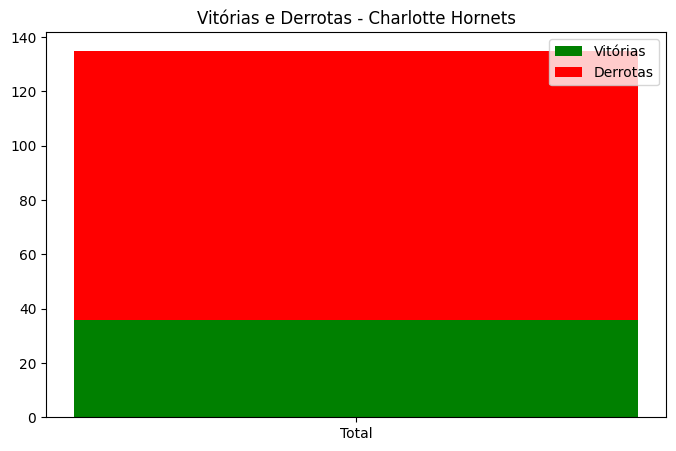

In [94]:
# Gráfico 1: Barras Empilhadas de Vitórias e Derrotas
plt.figure(figsize=(8, 5))
plt.bar(["Total"], [wins], color="green", label="Vitórias")
plt.bar(["Total"], [losses], bottom=[wins], color="red", label="Derrotas")
plt.title("Vitórias e Derrotas - Charlotte Hornets")
plt.legend()
plt.show()


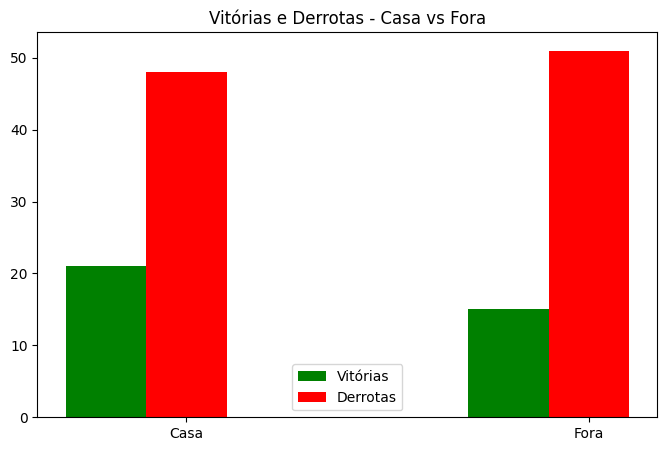

In [95]:
# Gráfico 2: Barras Agrupadas (Vitórias e Derrotas em Casa/Fora)
labels = ["Casa", "Fora"]
values = [[wins_home, wins_away], [losses_home, losses_away]]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width, values[0], width, label="Vitórias", color="green")
ax.bar(x, values[1], width, label="Derrotas", color="red")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Vitórias e Derrotas - Casa vs Fora")
ax.legend()
plt.show()


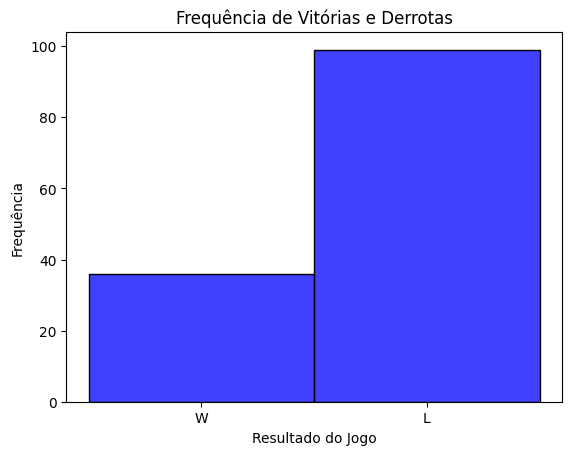

In [96]:
# Gráfico 3: Histograma de Vitórias e Derrotas
sns.histplot(games["WL"], bins=2, color="blue", kde=False)
plt.title("Frequência de Vitórias e Derrotas")
plt.xlabel("Resultado do Jogo")
plt.ylabel("Frequência")
plt.show()


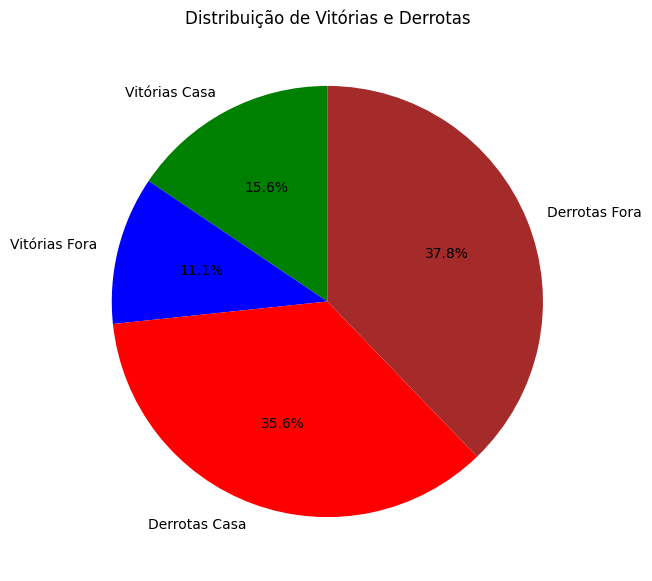

In [97]:
# Gráfico 4: Gráfico de Pizza
sizes = [wins_home, wins_away, losses_home, losses_away]
labels = ["Vitórias Casa", "Vitórias Fora", "Derrotas Casa", "Derrotas Fora"]
colors = ["green", "blue", "red", "brown"]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Distribuição de Vitórias e Derrotas")
plt.show()

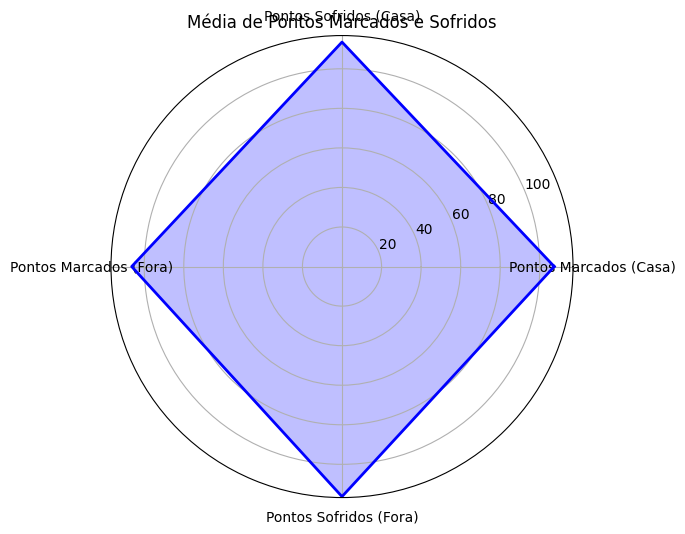

In [98]:
# Gráfico 5: Radar (Média de Pontos Marcados/Sofridos)
stats = [
    games[games["Home"] == "Home"]["Points_Scored"].mean(),
    games[games["Home"] == "Home"]["Points_Allowed"].mean(),
    games[games["Home"] == "Away"]["Points_Scored"].mean(),
    games[games["Home"] == "Away"]["Points_Allowed"].mean()
]

labels = ["Pontos Marcados (Casa)", "Pontos Sofridos (Casa)", "Pontos Marcados (Fora)", "Pontos Sofridos (Fora)"]

angles = np.linspace(0, 2 * np.pi, len(stats), endpoint=False).tolist()
stats += stats[:1]  # Fechar gráfico
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})
ax.fill(angles, stats, color="blue", alpha=0.25)
ax.plot(angles, stats, color="blue", linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Média de Pontos Marcados e Sofridos")
plt.show()

In [99]:
stats

[107.31884057971014,
 113.5072463768116,
 106.34848484848484,
 116.3030303030303,
 107.31884057971014]

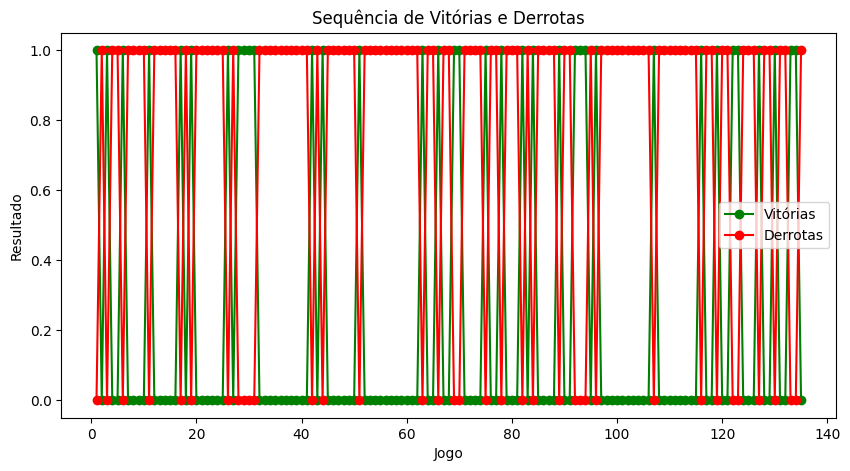

In [100]:
# Gráfico 6: Gráfico de Linhas (Sequência de Vitórias e Derrotas)
games["Game_Number"] = range(1, len(games) + 1)
plt.figure(figsize=(10, 5))
plt.plot(games["Game_Number"], games["Win"], marker="o", linestyle="-", color="green", label="Vitórias")
plt.plot(games["Game_Number"], games["Loss"], marker="o", linestyle="-", color="red", label="Derrotas")
plt.title("Sequência de Vitórias e Derrotas")
plt.xlabel("Jogo")
plt.ylabel("Resultado")
plt.legend()
plt.show()


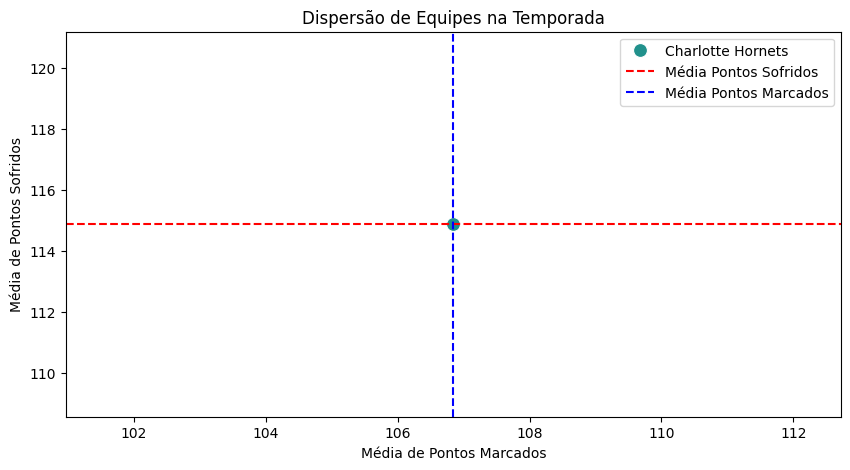

In [101]:
# Gráfico 7: Gráfico de Dispersão (Média de Pontos por Equipe)
team_avg_points = games.groupby("TEAM_NAME")[["Points_Scored", "Points_Allowed"]].mean()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=team_avg_points["Points_Scored"], y=team_avg_points["Points_Allowed"], hue=team_avg_points.index, palette="viridis", s=100)
plt.axhline(games["Points_Allowed"].mean(), color="r", linestyle="--", label="Média Pontos Sofridos")
plt.axvline(games["Points_Scored"].mean(), color="b", linestyle="--", label="Média Pontos Marcados")
plt.xlabel("Média de Pontos Marcados")
plt.ylabel("Média de Pontos Sofridos")
plt.title("Dispersão de Equipes na Temporada")
plt.legend()
plt.show()

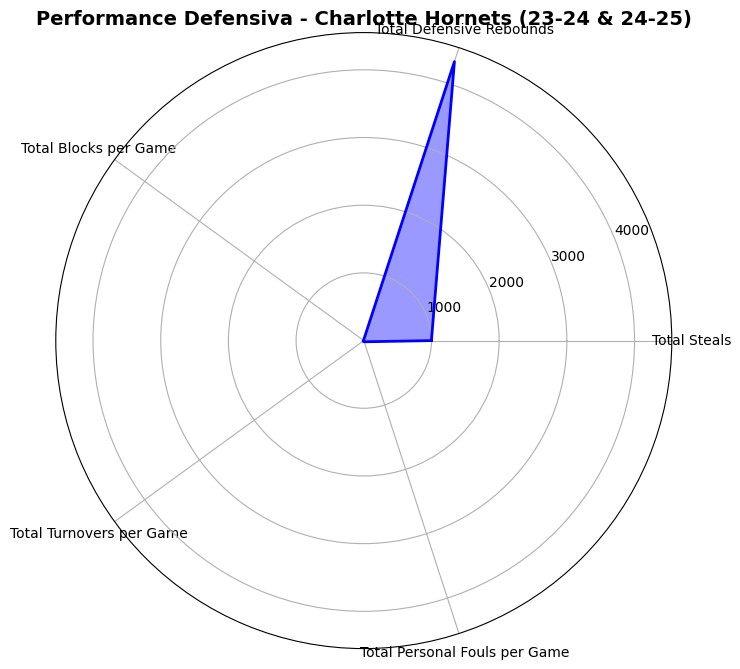

In [102]:
# Dados extraídos da performance defensiva
categories = list(defensive_performance_totals.keys())
values = list(defensive_performance_totals.values())

# Criar ângulos para cada categoria
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Fechar o gráfico
values += values[:1]
angles += angles[:1]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.fill(angles, values, color='blue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

# Configuração dos rótulos
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Título do gráfico
plt.title('Performance Defensiva - Charlotte Hornets (23-24 & 24-25)', fontsize=14, fontweight='bold')

# Exibir o gráfico
plt.show()

Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):
Total Steals: 999
Total Defensive Rebounds: 4334
Total Blocks per Game: 4.76
Total Turnovers per Game: 14.15
Total Personal Fouls per Game: 18.87


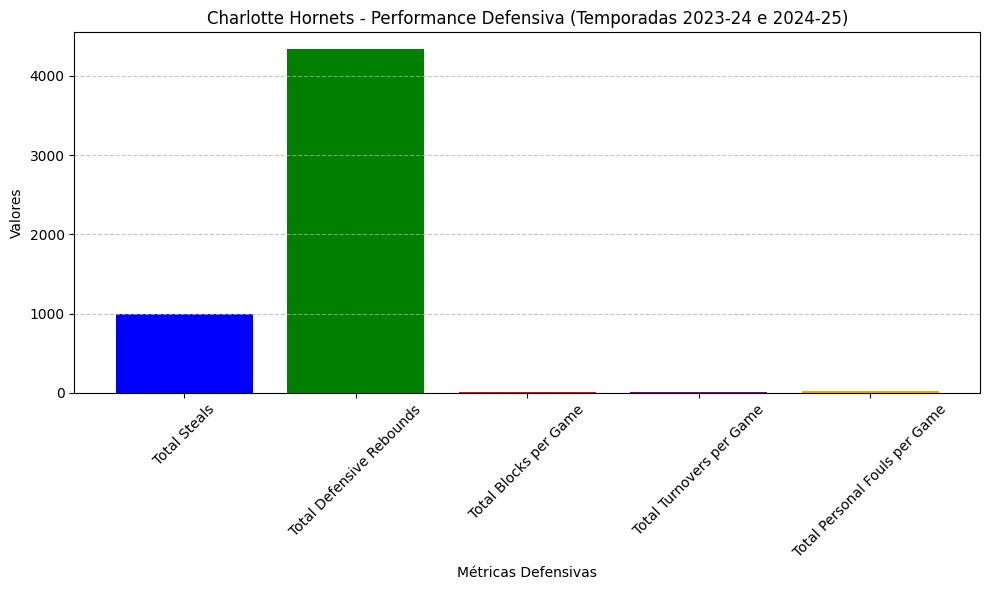

In [103]:
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a performance defensiva
def calculate_defensive_performance(team_games):
    # Calcular totais
    defensive_performance = {
        "Total Steals": team_games['STL'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Blocks per Game": team_games['BLK'].mean(),
        "Total Turnovers per Game": team_games['TOV'].mean(),
        "Total Personal Fouls per Game": team_games['PF'].mean()
    }
    return defensive_performance

# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular a performance defensiva
defensive_performance_totals = calculate_defensive_performance(all_games)

# Exibir os resultados
print("Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):")
for key, value in defensive_performance_totals.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

# Criar gráfico de barras
metrics = list(defensive_performance_totals.keys())
values = list(defensive_performance_totals.values())

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25)')
plt.xlabel('Métricas Defensivas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

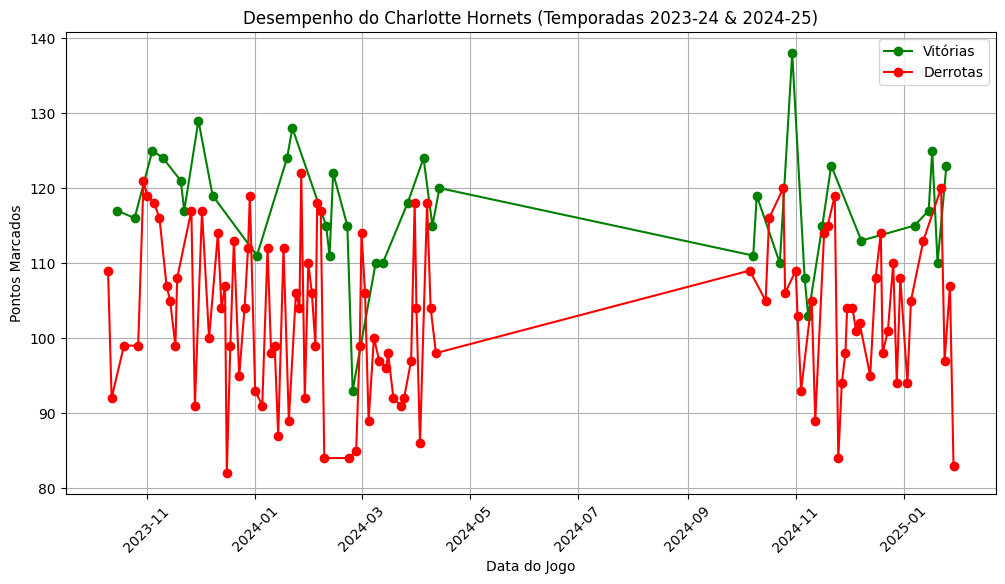

In [104]:
# Converter a coluna GAME_DATE para datetime caso não tenha sido feita antes
team_games_display['GAME_DATE'] = pd.to_datetime(team_games_display['GAME_DATE'])

# Ordenar os jogos por data
team_games_display = team_games_display.sort_values(by='GAME_DATE')

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Separar jogos vencidos e perdidos
wins = team_games_display[team_games_display['RESULT'] == 'Vitória']
losses = team_games_display[team_games_display['RESULT'] == 'Derrota']

# Plotar vitórias com linha verde
plt.plot(wins['GAME_DATE'], wins['PTS'], marker='o', linestyle='-', color='green', label="Vitórias")

# Plotar derrotas com linha vermelha
plt.plot(losses['GAME_DATE'], losses['PTS'], marker='o', linestyle='-', color='red', label="Derrotas")

# Ajustes do gráfico
plt.xlabel('Data do Jogo')
plt.ylabel('Pontos Marcados')
plt.title('Desempenho do Charlotte Hornets (Temporadas 2023-24 & 2024-25)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


In [ ]:
# DASHBOARD PONTUAÇÕES

# import streamlit as st
# import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go
# from nba_api.stats.endpoints import leaguegamefinder

# # Lista de times da NBA
# nba_teams = {
#     "ATL": "Atlanta Hawks", "BOS": "Boston Celtics", "BKN": "Brooklyn Nets", "CHA": "Charlotte Hornets",
#     "CHI": "Chicago Bulls", "CLE": "Cleveland Cavaliers", "DAL": "Dallas Mavericks", "DEN": "Denver Nuggets",
#     "DET": "Detroit Pistons", "GSW": "Golden State Warriors", "HOU": "Houston Rockets", "IND": "Indiana Pacers",
#     "LAC": "Los Angeles Clippers", "LAL": "Los Angeles Lakers", "MEM": "Memphis Grizzlies", "MIA": "Miami Heat",
#     "MIL": "Milwaukee Bucks", "MIN": "Minnesota Timberwolves", "NOP": "New Orleans Pelicans", "NYK": "New York Knicks",
#     "OKC": "Oklahoma City Thunder", "ORL": "Orlando Magic", "PHI": "Philadelphia 76ers", "PHX": "Phoenix Suns",
#     "POR": "Portland Trail Blazers", "SAC": "Sacramento Kings", "SAS": "San Antonio Spurs", "TOR": "Toronto Raptors",
#     "UTA": "Utah Jazz", "WAS": "Washington Wizards"
# }

# # Função para buscar jogos por temporada de um time específico
# def get_team_games(team_abbreviation, season):
#     try:
#         gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
#         games = gamefinder.get_data_frames()[0]
#         return games[games['TEAM_ABBREVIATION'] == team_abbreviation]
#     except Exception as e:
#         st.error(f"Erro ao buscar jogos para {team_abbreviation} na temporada {season}: {e}")
#         return pd.DataFrame()

# # Função para calcular estatísticas do time
# def calculate_team_stats(team_games):
#     if team_games.empty:
#         return {}

#     team_games['Home/Away'] = team_games['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')

#     stats = {
#         "Points per Game": team_games['PTS'].mean(),
#         "Assists per Game": team_games['AST'].mean(),
#         "Rebounds per Game": team_games['REB'].mean(),
#         "3-Point Field Goals Made": team_games['FG3M'].sum(),
#         "Total Home Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Home')).sum(),
#         "Total Away Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Away')).sum()
#     }
#     return stats

# # Função para calcular a média de pontos marcados e sofridos por time
# def calculate_team_points_averages(season):
#     team_averages = [
#         {
#             "Team": team_name,
#             "Avg Points Scored": games['PTS'].mean(),
#             "Avg Points Allowed": (games['PTS'] - games['PLUS_MINUS']).mean()
#         }
#         for team_abbreviation, team_name in nba_teams.items()
#         if not (games := get_team_games(team_abbreviation, season)).empty
#     ]
#     return pd.DataFrame(team_averages)


# # Configuração do Streamlit
# st.title("🏀 Estatísticas de Times da NBA - Temporadas 2023-24 e 2024-25")

# # Seleção do time
# team_abbreviation = st.selectbox("Selecione um time:", options=list(nba_teams.keys()), format_func=lambda x: nba_teams[x])

# # Seleção da temporada
# season_options = ["2023-24", "2024-25"]
# selected_season = st.selectbox("Selecione a temporada:", season_options)

# # Buscar jogos da temporada selecionada
# games = get_team_games(team_abbreviation, selected_season)

# # Calcular estatísticas
# team_stats = calculate_team_stats(games)

# # Exibir os resultados
# if team_stats:
#     st.subheader(f"📊 {nba_teams[team_abbreviation]} - Estatísticas na Temporada {selected_season}")
    
#     # Criar dataframe para exibição
#     stats_df = pd.DataFrame(team_stats.items(), columns=["Categoria", "Valor"])
#     stats_df['Valor'] = stats_df['Valor'].round(2)
#     st.dataframe(stats_df, use_container_width=True)

#     # Exibir gráfico de barras
#     st.bar_chart(stats_df.set_index("Categoria"))
# # else:
#     st.warning(f"Nenhum dado encontrado para o {nba_teams[team_abbreviation]} na temporada {selected_season}.")

# # Processamento dos dados para o gráfico de radar
# if not games.empty:
#     games["Home"] = games["MATCHUP"].apply(lambda x: "Home" if "vs." in x else "Away")
#     games["Points_Scored"] = games["PTS"]
#     games["Points_Allowed"] = games["PTS"] - games["PLUS_MINUS"]

#     # Gráfico 5: Radar (Média de Pontos Marcados/Sofridos)
#     st.subheader("Média de Pontos Marcados e Sofridos")
#     stats = [
#         games[games["Home"] == "Home"]["Points_Scored"].mean(),
#         games[games["Home"] == "Home"]["Points_Allowed"].mean(),
#         games[games["Home"] == "Away"]["Points_Scored"].mean(),
#         games[games["Home"] == "Away"]["Points_Allowed"].mean()
#     ]
#     labels = ["Pontos Marcados (Casa)", "Pontos Sofridos (Casa)", "Pontos Marcados (Fora)", "Pontos Sofridos (Fora)"]
#     fig5 = go.Figure(data=go.Scatterpolar(
#         r=stats + stats[:1],  # Fechar o círculo
#         theta=labels + labels[:1],  # Fechar o círculo
#         fill='toself',
#         name="Média de Pontos"
#     ))
#     fig5.update_layout(
#         polar=dict(
#             radialaxis=dict(
#                 visible=True,
#                 range=[0, max(stats) + 10]  # Ajustar o range para melhor visualização
#             )
#         ),
#         showlegend=True
#     )
#     st.plotly_chart(fig5)

# # Gráfico de Dispersão: Média de Pontos Marcados vs Sofridos por Time
# st.subheader("Gráfico de Dispersão: Média de Pontos Marcados vs Sofridos")
# team_averages_df = calculate_team_points_averages(selected_season)

# # Verificar se há dados para exibir
# if not team_averages_df.empty:
#     st.write("Dados coletados para o gráfico de dispersão:")
#     st.dataframe(team_averages_df)  # Exibir os dados coletados para depuração

#     # Criar o gráfico de dispersão
#     fig6 = px.scatter(
#         team_averages_df,
#         x="Avg Points Scored",
#         y="Avg Points Allowed",
#         text="Team",
#         title=f"Média de Pontos Marcados vs Sofridos na Temporada {selected_season}",
#         labels={
#             "Avg Points Scored": "Média de Pontos Marcados",
#             "Avg Points Allowed": "Média de Pontos Sofridos"
#         }
#     )
#     fig6.update_traces(textposition='top center')
#     st.plotly_chart(fig6)
# # else:
#     st.warning("Nenhum dado encontrado para exibir o gráfico de dispersão.")
